In [11]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report
from sklearn.linear_model import LogisticRegression
from xgboost import XGBClassifier
from sklearn.ensemble import RandomForestClassifier
import matplotlib.pyplot as plt
import joblib
import shap

In [13]:
df = pd.read_csv("../data/diabetes.csv")

In [15]:
df.head()

Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0            6      148             72             35        0  33.6   
1            1       85             66             29        0  26.6   
2            8      183             64              0        0  23.3   
3            1       89             66             23       94  28.1   
4            0      137             40             35      168  43.1   

   DiabetesPedigreeFunction  Age  Outcome  
0                     0.627   50        1  
1                     0.351   31        0  
2                     0.672   32        1  
3                     0.167   21        0  
4                     2.288   33        1

In [17]:
df.shape

(768, 9)

In [19]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [21]:
X = df.drop(columns = ['Outcome'])
y = df['Outcome']

In [23]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42, stratify = y)

In [25]:
print(X_train.shape)

(614, 8)


# Random Forest Classifier 

In [28]:
rf_model = RandomForestClassifier(n_estimators=20)
rf_model.fit(X_train, y_train)

RandomForestClassifier(n_estimators=20)

In [30]:
y_rf_pred = rf_model.predict(X_test)

## Results of Random Forest Classifier

In [33]:
print("Random Forest Peformance")
print("Accuracy:", accuracy_score(y_test, y_rf_pred))
print(classification_report(y_test, y_rf_pred))

Random Forest Peformance
Accuracy: 0.7207792207792207
              precision    recall  f1-score   support

           0       0.78      0.79      0.79       100
           1       0.60      0.59      0.60        54

    accuracy                           0.72       154
   macro avg       0.69      0.69      0.69       154
weighted avg       0.72      0.72      0.72       154



## SVM Model

In [36]:
svm_model = SVC(probability = True, random_state = 42)
svm_model.fit(X_train, y_train)

SVC(probability=True, random_state=42)

In [38]:
y_pred_svm = svm_model.predict(X_test)
print("SVM Peformance")
print("Accuracy:", accuracy_score(y_test, y_pred_svm))
print(classification_report(y_test, y_pred_svm))

SVM Peformance
Accuracy: 0.7207792207792207
              precision    recall  f1-score   support

           0       0.74      0.88      0.80       100
           1       0.66      0.43      0.52        54

    accuracy                           0.72       154
   macro avg       0.70      0.65      0.66       154
weighted avg       0.71      0.72      0.70       154



## XGB Model

In [41]:
xgb_model = XGBClassifier(
    n_estimators=100,        # number of trees
    max_depth=4,             # limit tree depth to prevent overfitting
    learning_rate=0.1,       # how fast we correct mistakes
    eval_metric='logloss',   # avoid warning about eval_metric
    random_state=42
)

In [54]:
xgb_model.fit(X_train, y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric='logloss',
              feature_types=None, feature_weights=None, gamma=None,
              grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.1, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=4, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=100, n_jobs=None,
              num_parallel_tree=None, ...)

In [56]:
y_pred_xgb = xgb_model.predict(X_test)

print("XGBoost Performance:")
print("Accuracy:", accuracy_score(y_test, y_pred_xgb))
print(classification_report(y_test, y_pred_xgb))

XGBoost Performance:
Accuracy: 0.7727272727272727
              precision    recall  f1-score   support

           0       0.82      0.84      0.83       100
           1       0.69      0.65      0.67        54

    accuracy                           0.77       154
   macro avg       0.75      0.74      0.75       154
weighted avg       0.77      0.77      0.77       154



## We can try feature engineering

In [59]:
df['BMI_Age'] = df['BMI'] * df['Age']
df['Glucose_Insulin_Ratio'] = df['Glucose'] / (df['Insulin'] + 1)  # +1 to avoid division by zero
df['BP_BMI'] = df['BloodPressure'] * df['BMI']
df['Glucose_Squared'] = df['Glucose'] ** 2
df['Skin_BMI'] = df['SkinThickness'] * df['BMI']

In [61]:
X = df.drop(columns=['Outcome'])  # Now X includes new features
y = df['Outcome']

In [63]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

## Random Forest for new features

In [66]:
rf_model_e = RandomForestClassifier(n_estimators = 20)

In [68]:
rf_model_e.fit(X_train, y_train)

RandomForestClassifier(n_estimators=20)

In [70]:
new_y_pr = rf_model_e.predict(X_test)

In [72]:
print("Forest Performance:")
print("Accuracy:", accuracy_score(y_test, new_y_pr))
print(classification_report(y_test, new_y_pr))

Forest Performance:
Accuracy: 0.7597402597402597
              precision    recall  f1-score   support

           0       0.79      0.86      0.82       100
           1       0.69      0.57      0.63        54

    accuracy                           0.76       154
   macro avg       0.74      0.72      0.72       154
weighted avg       0.75      0.76      0.75       154



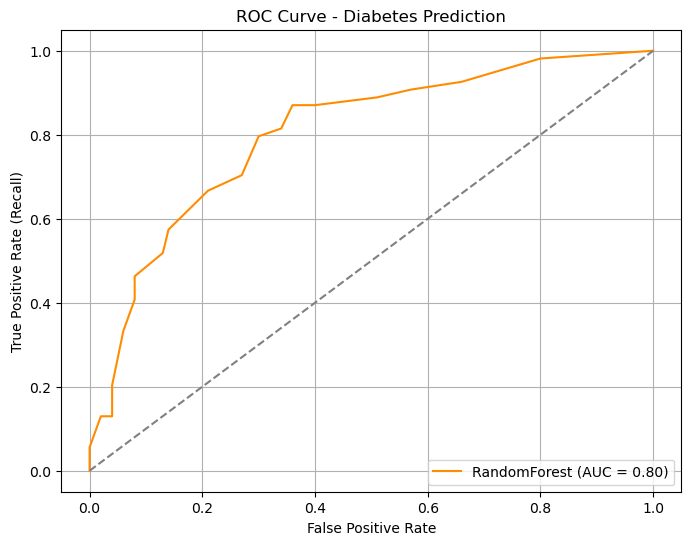

In [74]:
from sklearn.metrics import roc_curve, roc_auc_score
y_pred_prob = rf_model_e.predict_proba(X_test)[:, 1]  # probability for class 1

# Compute ROC curve and AUC
fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob)
auc_score = roc_auc_score(y_test, y_pred_prob)

# Plot ROC curve
plt.figure(figsize=(8,6))
plt.plot(fpr, tpr, label=f'RandomForest (AUC = {auc_score:.2f})', color='darkorange')
plt.plot([0, 1], [0, 1], linestyle='--', color='gray')  # diagonal line
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate (Recall)')
plt.title('ROC Curve - Diabetes Prediction')
plt.legend(loc='lower right')
plt.grid(True)
plt.show()

In [76]:
xgb_model_fe = XGBClassifier(
    n_estimators=100,
    max_depth=4,
    learning_rate=0.1,
    eval_metric='logloss',
    random_state=42
)

In [86]:
xgb_model_fe.fit(X_train, y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric='logloss',
              feature_types=None, feature_weights=None, gamma=None,
              grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.1, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=4, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=100, n_jobs=None,
              num_parallel_tree=None, ...)

In [88]:
y_pred_fe = xgb_model_fe.predict(X_test)

In [90]:
xgb_model_new = XGBClassifier(
    n_estimators=100,
    max_depth=4,
    learning_rate=0.1,
    eval_metric='logloss',
    random_state=42
)

In [92]:
print("XGBoost Performance with Feature Engineering:")
print("Accuracy:", accuracy_score(y_test, y_pred_fe))
print(classification_report(y_test, y_pred_fe))

XGBoost Performance with Feature Engineering:
Accuracy: 0.7727272727272727
              precision    recall  f1-score   support

           0       0.82      0.84      0.83       100
           1       0.69      0.65      0.67        54

    accuracy                           0.77       154
   macro avg       0.75      0.74      0.75       154
weighted avg       0.77      0.77      0.77       154



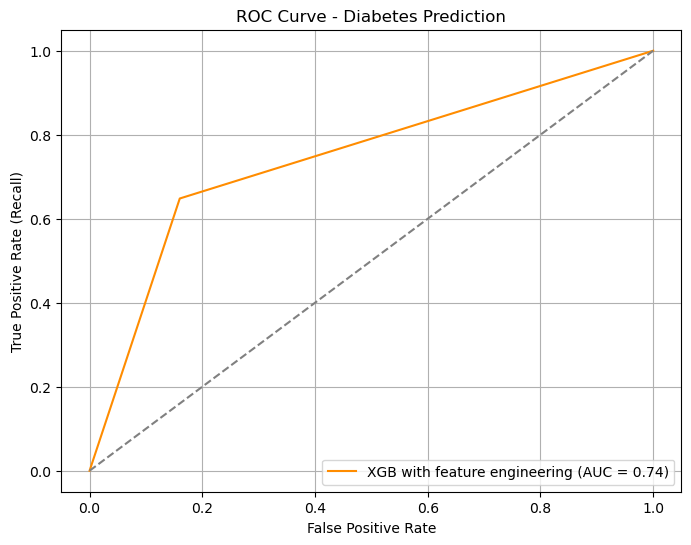

In [103]:
y_pred_prob = xgb_model_fe.predict_proba(X_test)[:, 1]  # probability for class 1

# Compute ROC curve and AUC
fpr, tpr, thresholds = roc_curve(y_test, y_pred_fe)
auc_score = roc_auc_score(y_test, y_pred_fe)

# Plot ROC curve
plt.figure(figsize=(8,6))
plt.plot(fpr, tpr, label=f'XGB with feature engineering (AUC = {auc_score:.2f})', color='darkorange')
plt.plot([0, 1], [0, 1], linestyle='--', color='gray')  # diagonal line
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate (Recall)')
plt.title('ROC Curve - Diabetes Prediction')
plt.legend(loc='lower right')
plt.grid(True)
plt.show()

# Best performance so far

In [106]:
importances = xgb_model_fe.feature_importances_

In [108]:
feature_names = X.columns 

In [110]:
feature_names

Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age', 'BMI_Age',
       'Glucose_Insulin_Ratio', 'BP_BMI', 'Glucose_Squared', 'Skin_BMI'],
      dtype='object')

In [112]:
feat_importances = pd.Series(importances, index=feature_names)

In [114]:
feat_importances = feat_importances.sort_values(ascending=True)

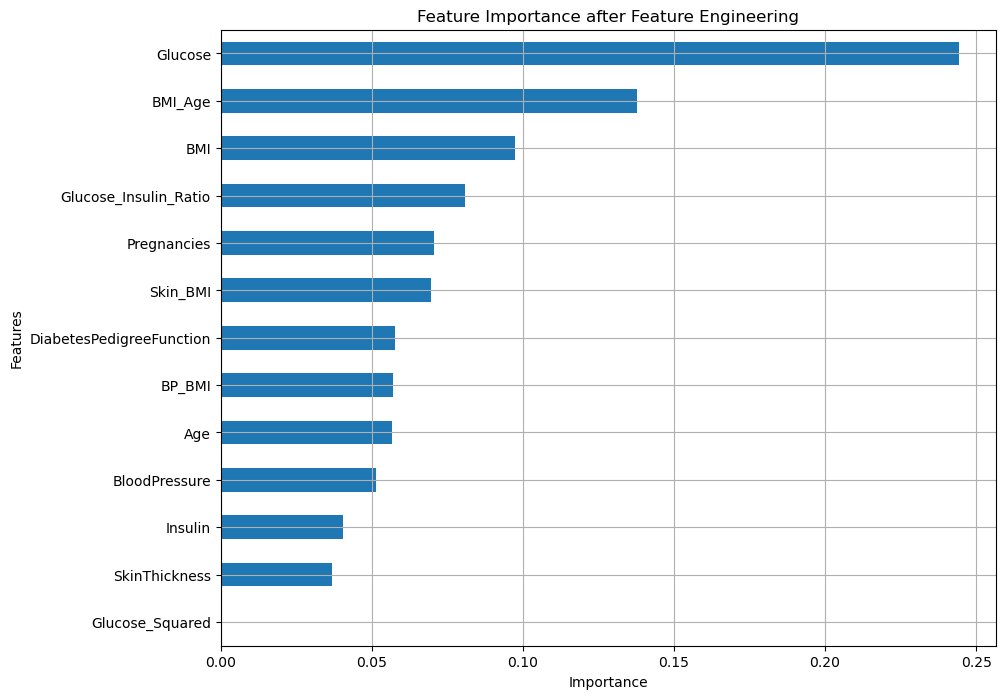

In [116]:
plt.figure(figsize=(10, 8))
feat_importances.plot(kind='barh')
plt.title('Feature Importance after Feature Engineering')
plt.xlabel('Importance')
plt.ylabel('Features')
plt.grid(True)
plt.show()

In [118]:
explainer = shap.Explainer(xgb_model_fe, X_train)

In [120]:
shap_values = explainer(X_test)

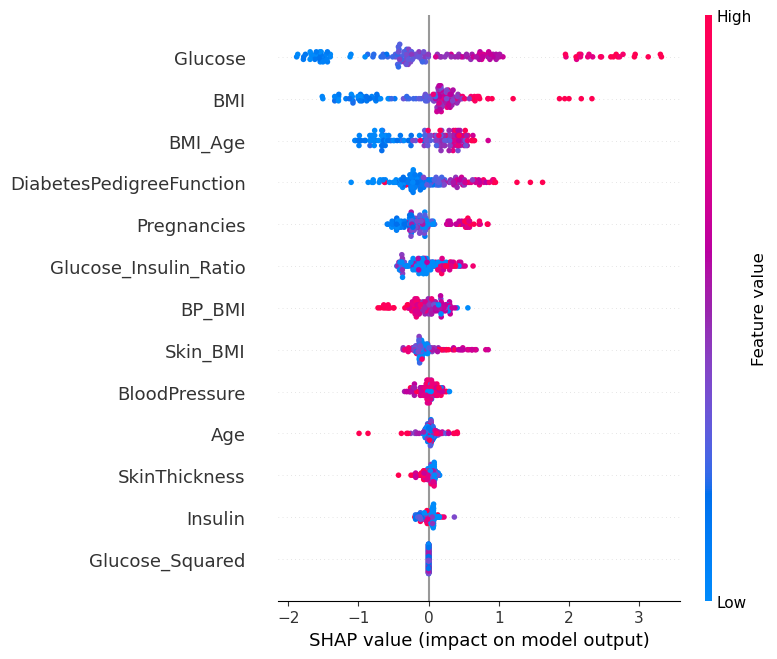

In [121]:
shap.summary_plot(shap_values, X_test)

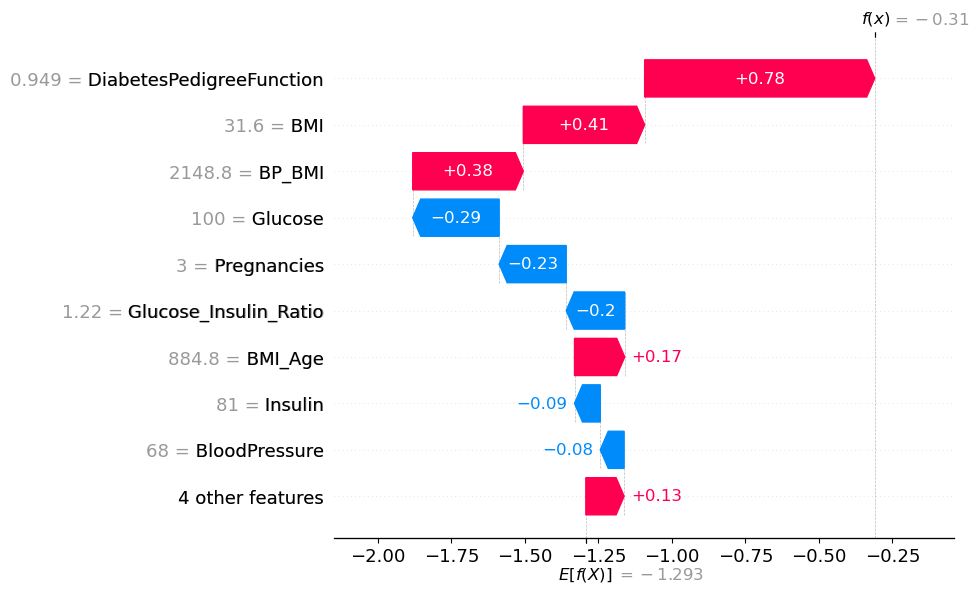

In [123]:
sample_idx = 5  # Pick any index from X_test
shap.plots.waterfall(shap_values[sample_idx])